# Covid Mobility Data Analysis for Trend Prediction
## Carson Woods, VZL837
## CPSC 4180 Fall 2020 Final Project
### Description:
Parsing Results Gathered from Other Analysis Scripts 

NOTE: MUST RUN OTHER SCRIPTS BEFORE THIS ONE

In [1]:
import os
import json

import matplotlib.pyplot as plt
%matplotlib inline

## Track Counts for Calculating Results

In [2]:
driving_average = 0
walking_average = 0
residential_average = 0
workplace_average = 0
apple_count = 0
google_count = 0

driving_p = 0
walking_p = 0
residential_p = 0
workplace_p = 0

rnn_val_loss_average = 0
rnn_perf_loss_average = 0
rnn_val_mean_sq_loss = 0
rnn_perf_mean_sq_loss = 0

lstm_val_loss_average = 0
lstm_perf_loss_average = 0
lstm_val_mean_sq_loss = 0
lstm_perf_mean_sq_loss = 0

gru_val_loss_average = 0
gru_perf_loss_average = 0
gru_val_mean_sq_loss = 0
gru_perf_mean_sq_loss = 0

ml_count = 0

results = dict()

## Retrieve Results
Iterates through all results and pulls out both machine learning and statistical regression results. 

In [3]:
for root, subdirs, files in os.walk('./results/'):
    for file in files:
        if file.endswith("regression_performance.txt"):
            country = file.split("_")[0].strip()
            results[country] = dict()
            with open(os.path.join(root, file), "r") as fp:
                line = fp.readline()
                while line:
                    unsplit_line = line
                    line = line.split()
                    if 'Driving Regression Performance:' in unsplit_line:
                        apple_count += 1
                        driving_average += float(line[-1])
                        results[country]['driving_r_sq'] = float(line[-1])
                    elif 'Walking Regression Performance:' in unsplit_line:
                        walking_average += float(line[-1])
                        results[country]['walking_r_sq'] = float(line[-1])
                    elif 'Residential Regression Performance:' in unsplit_line:
                        google_count += 1
                        residential_average += float(line[-1])
                        results[country]['residential_r_sq'] = float(line[-1])
                    elif 'Workplace Regression Performance:' in unsplit_line:
                        workplace_average += float(line[-1])
                        results[country]['workplace_r_sq'] = float(line[-1])
                    elif 'Driving Regression Summary' in unsplit_line:
                        for x in range(15):
                            line = fp.readline()
                        driving_p += float(line.split()[4].strip())
                        results[country]['driving_p'] = float(line.split()[4].strip())
                    elif 'Walking Regression Summary' in unsplit_line:
                        for x in range(15):
                            line = fp.readline()
                        walking_p += float(line.split()[4].strip())
                        results[country]['walking_p'] = float(line.split()[4].strip())
                    elif 'Residential Regression Summary' in unsplit_line:
                        for x in range(15):
                            line = fp.readline()
                        residential_p += float(line.split()[4].strip())
                        results[country]['residential_p'] = float(line.split()[4].strip())
                    elif 'Workplace Regression Summary' in unsplit_line:
                        for x in range(15):
                            line = fp.readline()
                        workplace_p += float(line.split()[4].strip())
                        results[country]['workplace_p'] = float(line.split()[4].strip())
                    line = fp.readline()

        if file.endswith('model_performance.txt'):
            ml_count += 1
            model_type = None
            with open(os.path.join(root, file), "r") as fp:
                line = fp.readline()
                while line:
                    line = line.split()
                    if 'RNN_MODEL:' in line:
                        model_type = 'rnn'
                    elif 'LSTM_MODEL:' in line:
                        model_type = 'lstm'
                    elif 'GRU_MODEL:' in line:
                        model_type = 'gru'
                    elif 'Val' in line:
                        if model_type == 'rnn':
                            rnn_val_loss_average += float(line[2].strip("[], "))
                            rnn_val_mean_sq_loss += float(line[3].strip("[], "))
                        elif model_type == 'lstm':
                            lstm_val_loss_average += float(line[2].strip("[], "))
                            lstm_val_mean_sq_loss += float(line[3].strip("[], "))
                        elif model_type == 'gru':
                            gru_val_loss_average += float(line[2].strip("[], "))
                            gru_val_mean_sq_loss += float(line[3].strip("[], "))
                    elif 'Val' not in line and 'Performance:' in line:
                        if model_type == 'rnn':
                            rnn_perf_loss_average += float(line[1].strip("[], "))
                            rnn_perf_mean_sq_loss += float(line[2].strip("[], "))
                        elif model_type == 'lstm':
                            lstm_perf_loss_average += float(line[1].strip("[], "))
                            lstm_perf_mean_sq_loss += float(line[2].strip("[], "))
                        elif model_type == 'gru':
                            gru_perf_loss_average += float(line[1].strip("[], "))
                            gru_perf_mean_sq_loss += float(line[2].strip("[], "))
                    line = fp.readline()

## Print Averages

In [4]:
print("REGRESSION AVERAGES:")
print("Driving Average: " + str(driving_average/apple_count))
print("Walking Average: " + str(walking_average/apple_count))
print("Residential Average: " + str(residential_average/google_count))
print("Workplace Average: " + str(workplace_average/google_count))

print("\nP-VALUE AVERAGES:")
print("Driving Average: " + str(driving_p/apple_count))
print("Walking Average: " + str(walking_p/apple_count))
print("Residential Average: " + str(residential_p/google_count))
print("Workplace Average: " + str(workplace_p/google_count))

print("\nML AVERAGES:")
print("RNN Validation Loss Average:" + str(rnn_val_loss_average/ml_count))
print("RNN Test Loss Average: " + str(rnn_perf_loss_average/ml_count))

print("LSTM Validation Loss Average: " + str(lstm_val_loss_average/ml_count))
print("LSTM Test Loss Average: " + str(lstm_perf_loss_average/ml_count))

print("GRU Validation Loss Average: " + str(gru_val_loss_average/ml_count))
print("GRU Test Loss Average: " + str(gru_perf_loss_average/ml_count))


REGRESSION AVERAGES:
Driving Average: 0.15334356903539687
Walking Average: 0.12974665086150802
Residential Average: 0.20959330098800277
Workplace Average: 0.11220238223170599

P-VALUE AVERAGES:
Driving Average: 0.0997857142857143
Walking Average: 0.03841071428571428
Residential Average: 0.596425925925926
Workplace Average: 0.06924074074074073

ML AVERAGES:
RNN Validation Loss Average:0.7806706253824562
RNN Test Loss Average: 2.4893063450681754
LSTM Validation Loss Average: 0.45746096172209444
LSTM Test Loss Average: 1.7417004093013961
GRU Validation Loss Average: 0.4549005193443134
GRU Test Loss Average: 1.8235185881113183


## Filter for Significant P-Values

In [5]:
for country in results.keys():
    if results[country]['driving_p'] >= .05:
        del results[country]['driving_p']
        del results[country]['driving_r_sq']

    if results[country]['walking_p'] >= .05:
        del results[country]['walking_p']
        del results[country]['walking_r_sq']

    try:
        if results[country]['residential_p'] >= .05:
            del results[country]['residential_p']
            del results[country]['residential_r_sq']

        if results[country]['workplace_p'] >= .05:
            del results[country]['workplace_p']
            del results[country]['workplace_r_sq']
    except:
        # Occurs when some data isn't included
        pass

# Prints sorted and filtered results in a human readable format
print(json.dumps(results, indent=4, sort_keys=True))

{
    "Albania": {
        "driving_p": 0.0,
        "driving_r_sq": 0.48328337904173524,
        "walking_p": 0.0,
        "walking_r_sq": 0.35172557085459766
    },
    "Argentina": {
        "driving_p": 0.0,
        "driving_r_sq": 0.010378075771045214,
        "walking_p": 0.0,
        "walking_r_sq": 0.03699177779454976
    },
    "Austria": {
        "driving_p": 0.0,
        "driving_r_sq": 0.023154258213696877,
        "walking_p": 0.0,
        "walking_r_sq": 0.03501189377699998,
        "workplace_p": 0.0,
        "workplace_r_sq": 0.12720639159760272
    },
    "Belgium": {
        "driving_p": 0.001,
        "driving_r_sq": 0.046542362273712556,
        "walking_p": 0.0,
        "walking_r_sq": 0.010398539608536761,
        "workplace_p": 0.0,
        "workplace_r_sq": 0.10720291849412134
    },
    "Brazil": {
        "walking_p": 0.0,
        "walking_r_sq": 0.0034314226627107924
    },
    "Bulgaria": {
        "driving_p": 0.0,
        "driving_r_sq": 0.443138511151258

## Graphically Show Analysis Results

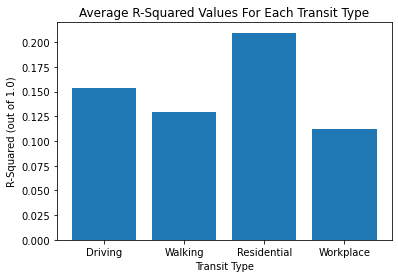

In [12]:
x = ['Driving', 'Walking', 'Residential', 'Workplace']
y = [driving_average/apple_count, 
     walking_average/apple_count, 
     residential_average/google_count,
     workplace_average/google_count]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y)
plt.xlabel("Transit Type")
plt.ylabel("R-Squared (out of 1.0)")
plt.title("Average R-Squared Values For Each Transit Type")

plt.xticks(x_pos, x)

plt.show()

# Ensures that figures directory exists
# If figure regeneration is needed,
# it ensures that the storage directory is regenerated
results_path = os.path.join(os.getcwd(), 'results')
if not os.path.exists(results_path):
    os.makedirs(os.path.join(os.getcwd(),'results'))

plt.savefig("./results/r_squared_averages.png")
plt.clf()
plt.close()

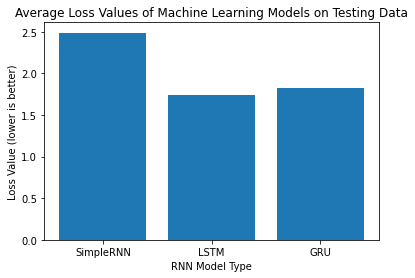

In [13]:
x = ['SimpleRNN', 'LSTM', 'GRU']
y = [rnn_perf_loss_average/ml_count, 
     lstm_perf_loss_average/ml_count, 
     gru_perf_loss_average/ml_count]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y)
plt.xlabel("RNN Model Type")
plt.ylabel("Loss Value (lower is better)")
plt.title("Average Loss Values of Machine Learning Models on Testing Data")

plt.xticks(x_pos, x)

plt.show()

# Ensures that figures directory exists
# If figure regeneration is needed,
# it ensures that the storage directory is regenerated
results_path = os.path.join(os.getcwd(), 'results')
if not os.path.exists(results_path):
    os.makedirs(os.path.join(os.getcwd(),'results'))

plt.savefig("./results/ml_loss_averages.png")
plt.clf()
plt.close()